<a href="https://colab.research.google.com/github/AnushreeHazra/ML_Projects/blob/main/Parkinson's_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parkinson's Disease Detection**

Importing Libraies

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

Data Importing

In [16]:
data = pd.read_csv('/content/Parkinsson disease.csv', delimiter=',')
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [17]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [18]:
data.shape

(195, 24)

Data Preprocessing

In [19]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [21]:
data.drop(columns="name", axis=1, inplace=True)

In [22]:
data.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [23]:
data.notnull()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
191,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
192,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
193,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [24]:
x = data.loc[:,data.columns!='status'].values[:,1:]
x1 = data.loc[:,data.columns!='status']

y = data.loc[:,'status'].values
y1 = data.loc[:,'status']
sum(y1==0)

48

In [25]:
sum(y1==1)

147

status
0    [[Axes(0.125,0.755806;0.125x0.124194), Axes(0....
1    [[Axes(0.125,0.755806;0.125x0.124194), Axes(0....
dtype: object

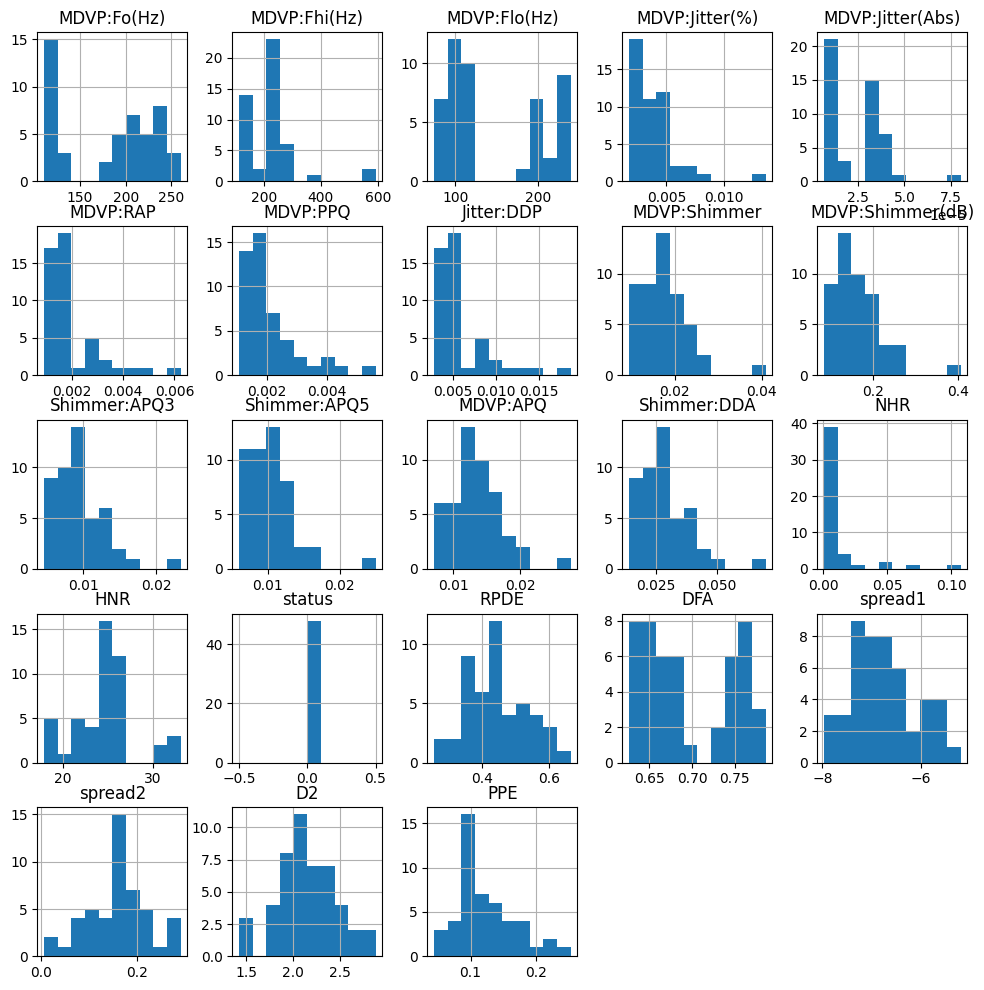

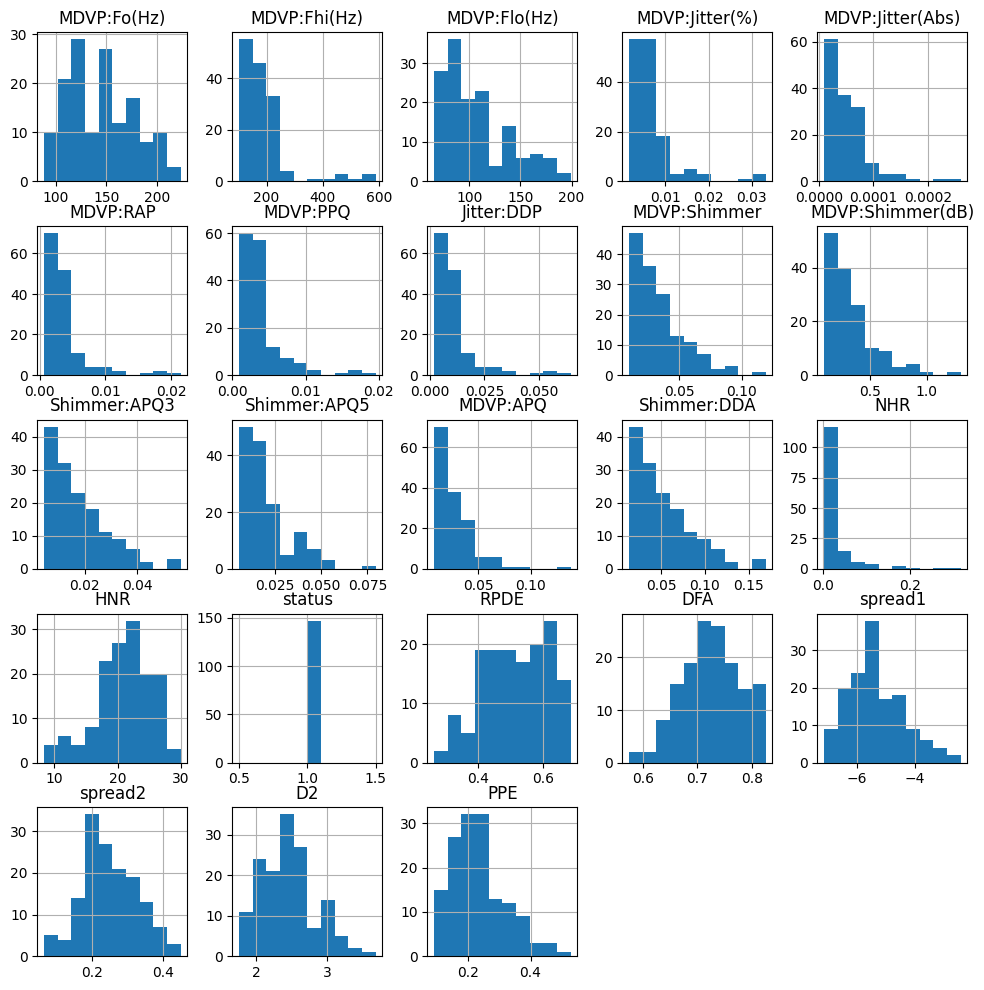

In [26]:
data.groupby('status').hist(figsize=(12, 12))

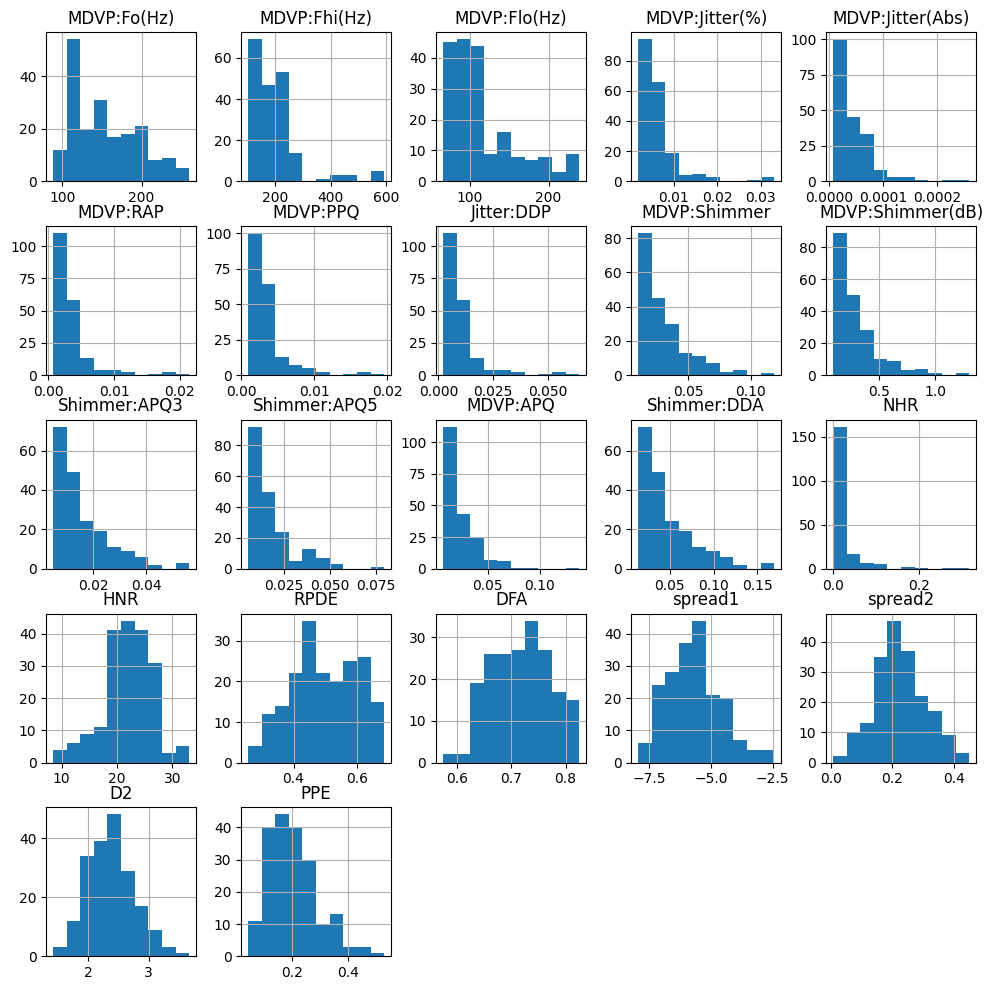

In [27]:
x1.hist(figsize=(12,12))
plt.show()

Data Visualization

<ipython-input-69-40a679e212d1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['status'], palette = 'mako')


<Axes: ylabel='count'>

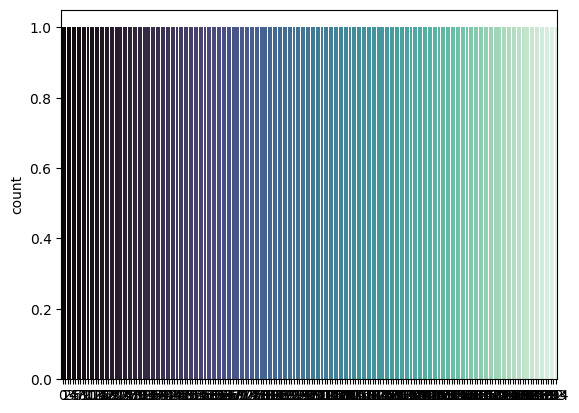

In [69]:
sns.countplot(data['status'], palette = 'mako')

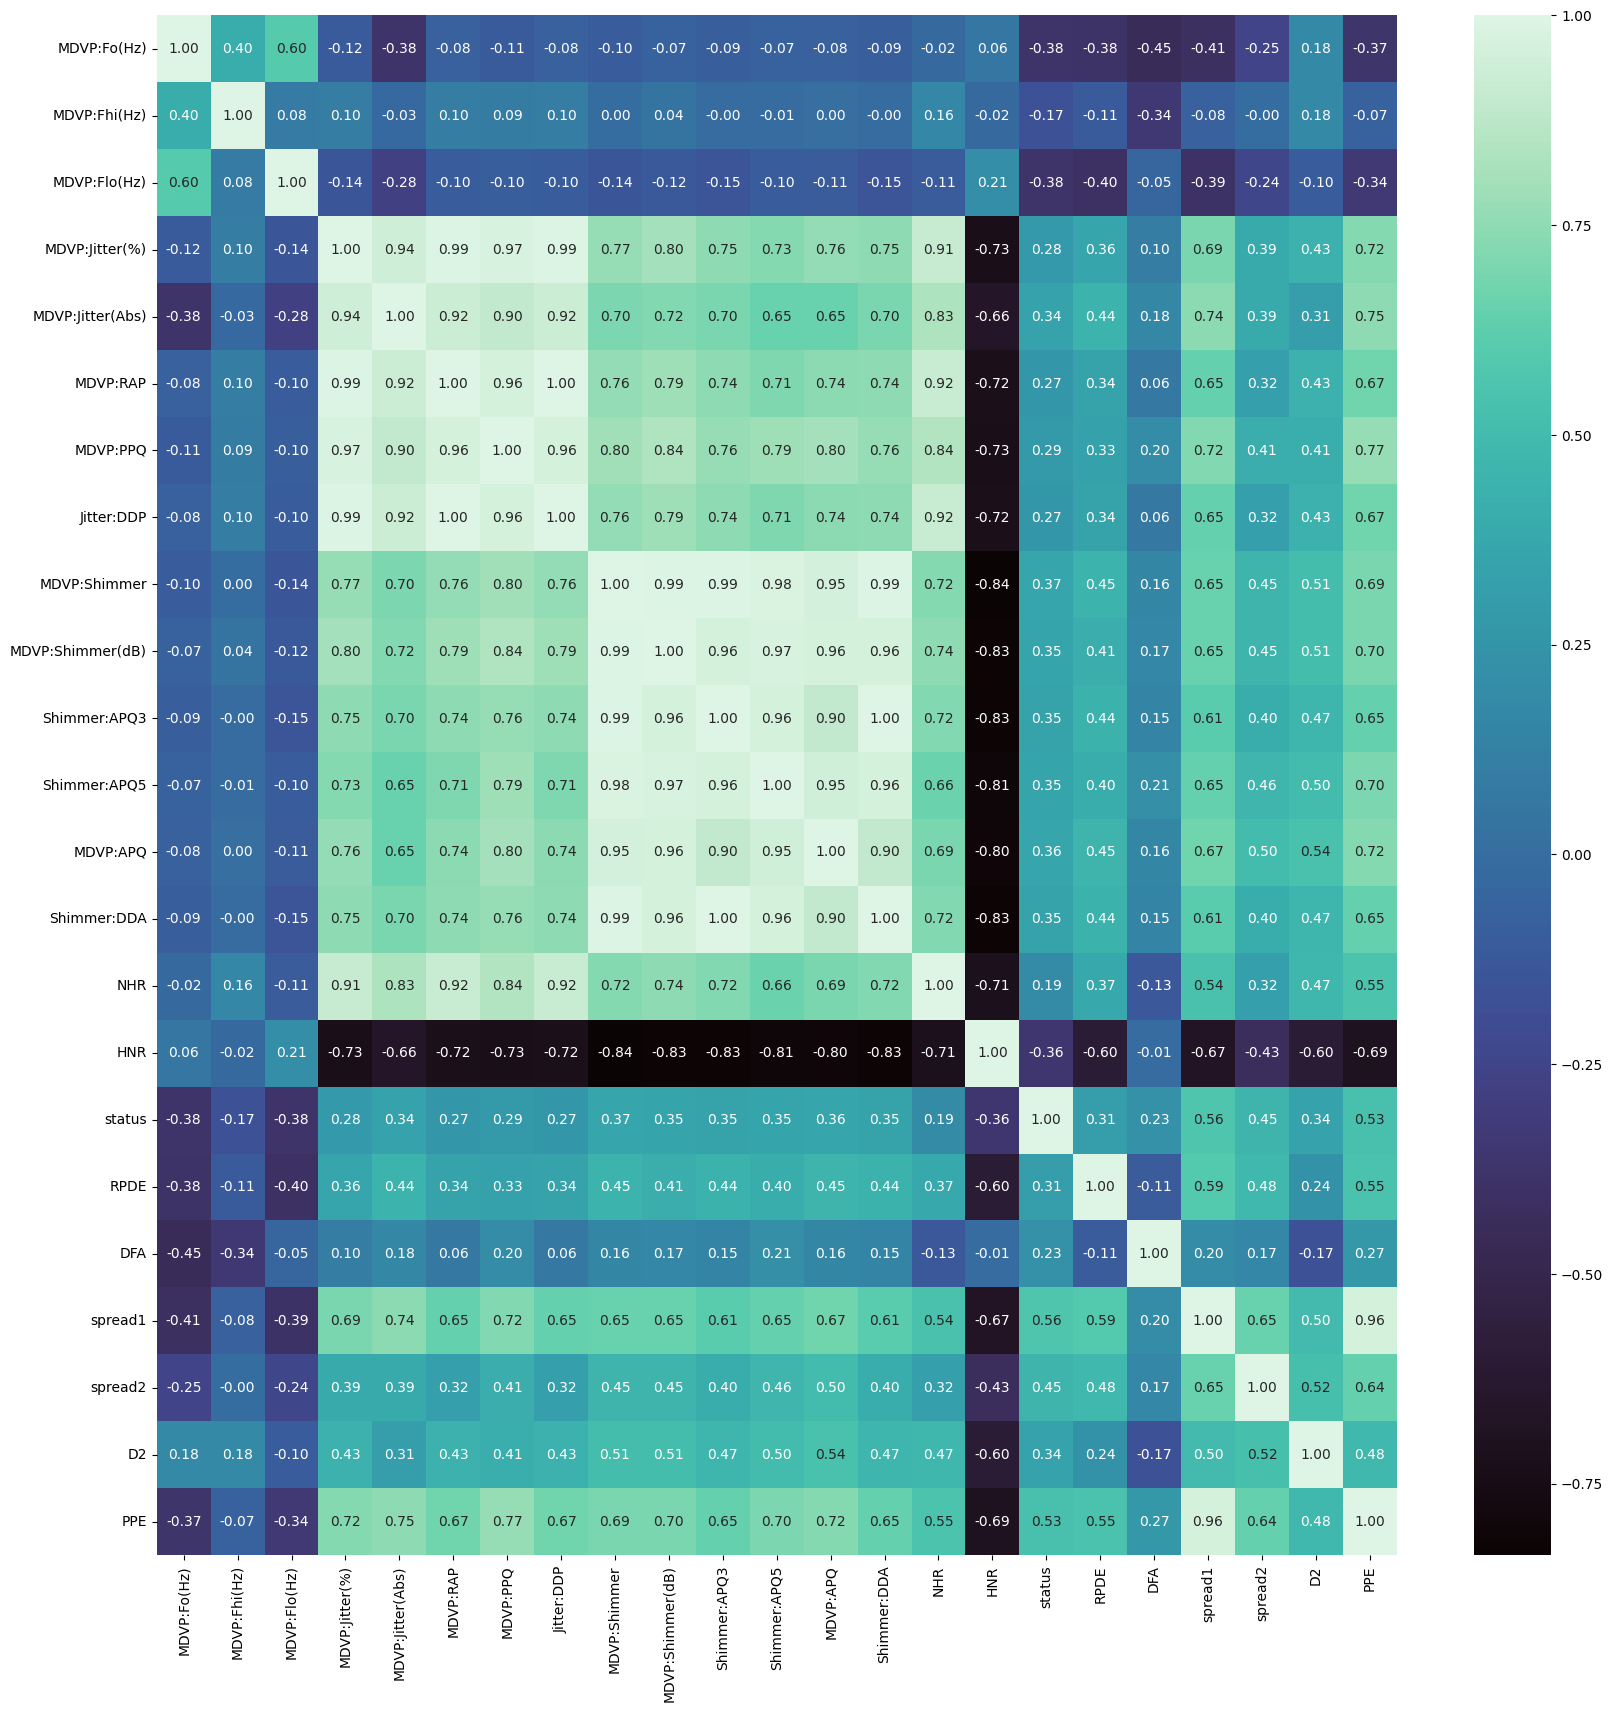

In [30]:
plt.figure(figsize=(20, 20))
dataplot = sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap="mako")

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=42,stratify=y)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,21):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)

    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max train score 100.0 % and k = [1]
Max test score 89.23076923076924 % and k = [7, 8]


In [34]:
knn = KNeighborsClassifier(7)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.8923076923076924

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier (n_neighbors = 7, metric = 'euclidean', p = 2)
classifier.fit(x_train, y_train)
print()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators = 12, criterion = 'entropy', random_state = 42)
classifier2.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=12, random_state=42)

-------------------- LOGISTIC REGRESSION --------------------
Classification report:
              precision    recall  f1-score   support

           0       0.65      0.59      0.62        22
           1       0.88      0.91      0.90        76

    accuracy                           0.84        98
   macro avg       0.77      0.75      0.76        98
weighted avg       0.83      0.84      0.83        98

-------------------------------------------------------------


<Axes: title={'center': 'Confusion Matrix'}>

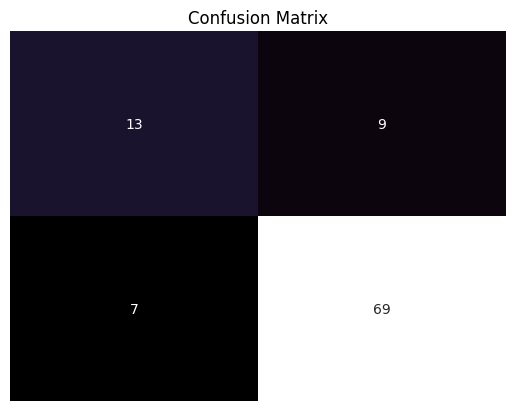

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train,y_train)
LogisticRegression(solver='liblinear')
logreg_pred = logreg.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
viz_str = '-'* 20
print(viz_str,'LOGISTIC REGRESSION',viz_str)
print('Classification report:')
print(classification_report(y_test,logreg_pred))
print('-'*61)
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,logreg_pred),annot=True,fmt='g',cmap='cubehelix',cbar=False, yticklabels=False, xticklabels=False)

-------------------- DECISION TREE --------------------
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        76

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

-------------------------------------------------------------


<Axes: title={'center': 'Confusion Matrix'}>

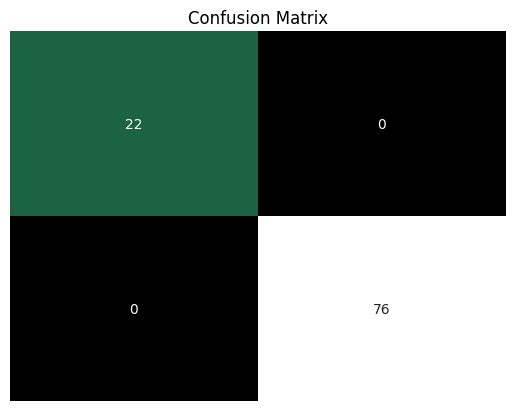

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_test,y_test)
DecisionTreeClassifier()
dtree_pred = dtree.predict(x_test)
viz_str = '-'* 20
print(viz_str,'DECISION TREE',viz_str)
print('Classification report:')
print(classification_report(y_test,dtree_pred))
print('-'*61)
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,dtree_pred),annot=True,fmt='g',cmap='cubehelix',cbar=False, yticklabels=False, xticklabels=False)

-------------------- RANDOM FOREST --------------------
Classification report:
              precision    recall  f1-score   support

           0       0.64      0.73      0.68        22
           1       0.92      0.88      0.90        76

    accuracy                           0.85        98
   macro avg       0.78      0.80      0.79        98
weighted avg       0.86      0.85      0.85        98

-------------------------------------------------------------


<Axes: title={'center': 'Confusion Matrix'}>

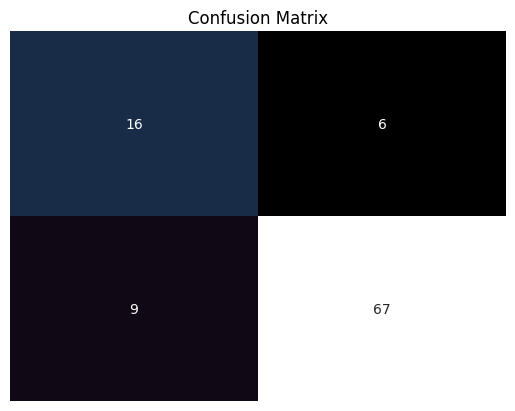

In [42]:
from sklearn.ensemble import RandomForestClassifier
rndfrst = RandomForestClassifier(n_estimators=100)
rndfrst.fit(x_train,y_train)
RandomForestClassifier()
rndfrst_pred = rndfrst.predict(x_test)
viz_str = '-'* 20
print(viz_str,'RANDOM FOREST',viz_str)
print('Classification report:')
print(classification_report(y_test,rndfrst_pred))
print('-'*61)
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,rndfrst_pred),annot=True,fmt='g',cmap='cubehelix',cbar=False, yticklabels=False, xticklabels=False)

In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.01,0.1,1,10],'gamma':[1,0.01,0.001]}
svm = SVC()
grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...................C=0.01, gamma=1;, score=0.750 total time=   0.0s
[CV 2/5] END ...................C=0.01, gamma=1;, score=0.700 total time=   0.0s
[CV 3/5] END ...................C=0.01, gamma=1;, score=0.737 total time=   0.0s
[CV 4/5] END ...................C=0.01, gamma=1;, score=0.737 total time=   0.0s
[CV 5/5] END ...................C=0.01, gamma=1;, score=0.737 total time=   0.0s
[CV 1/5] END ................C=0.01, gamma=0.01;, score=0.750 total time=   0.0s
[CV 2/5] END ................C=0.01, gamma=0.01;, score=0.700 total time=   0.0s
[CV 3/5] END ................C=0.01, gamma=0.01;, score=0.737 total time=   0.0s
[CV 4/5] END ................C=0.01, gamma=0.01;, score=0.737 total time=   0.0s
[CV 5/5] END ................C=0.01, gamma=0.01;, score=0.737 total time=   0.0s
[CV 1/5] END ...............C=0.01, gamma=0.001;, score=0.750 total time=   0.0s
[CV 2/5] END ...............C=0.01, gamma=0.001;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [1, 0.01, 0.001]},
             verbose=3)

-------------------- KNN --------------------
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.41      0.58        22
           1       0.85      1.00      0.92        76

    accuracy                           0.87        98
   macro avg       0.93      0.70      0.75        98
weighted avg       0.89      0.87      0.84        98

-------------------------------------------------------


<Axes: title={'center': 'Confusion Matrix'}>

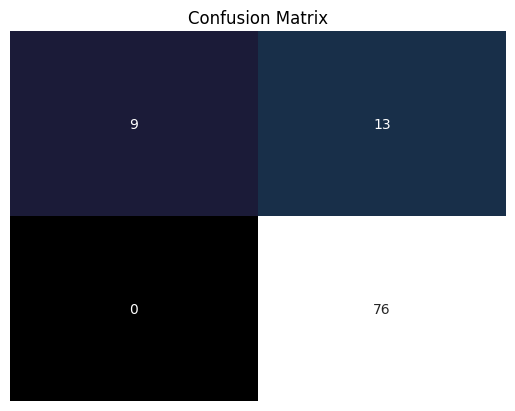

In [47]:
final_svm = SVC(C=1, gamma=0.01)
final_svm.fit(x_train,y_train)
svm_pred = final_svm.predict(x_test)
viz_str = '-'* 20
print(viz_str,'KNN',viz_str)
print('Classification report:')
print(classification_report(y_test,svm_pred))
print('-'*55)
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,svm_pred),annot=True,fmt='g',cmap='cubehelix',cbar=False, yticklabels=False, xticklabels=False)

Accuray Score

In [64]:
from sklearn.metrics import accuracy_score
y_pred_test = classifier2.predict(x_test)
cm2 = confusion_matrix(y_test, y_pred_test)
accuracy2= (cm2[0][0] + cm2[1][1]) / (cm2[0][0] + cm2[0][1] + cm2[1][0] + cm2[1][1])
print(accuracy2*100)

98.9795918367347


In [49]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
predict = model.predict(x_test)
pd.DataFrame({'Actual': y_test, 'Predict': predict})

,Actual,Predict
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
93,1,1
94,1,1
95,1,0
96,1,1


Plotting

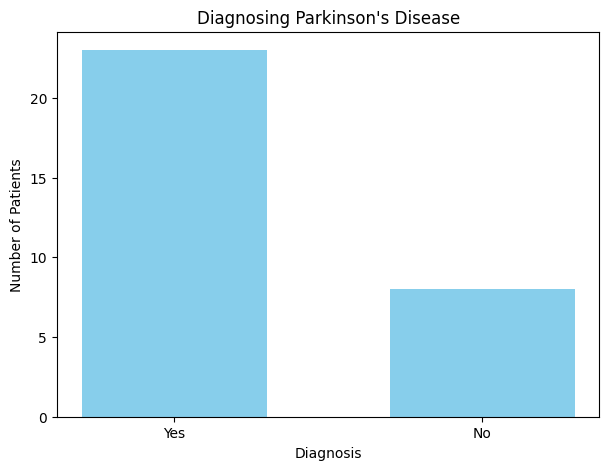

In [50]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
bar = {'Yes':23, 'No': 8}
diag = list(bar.keys())
values = list(bar.values())
fig = plt.figure(figsize = (7, 5))
plt.bar(diag, values, align = 'center', color ='skyblue',
        width = 0.6)
plt.xlabel("Diagnosis")
plt.ylabel("Number of Patients")
plt.title("Diagnosing Parkinson's Disease")
plt.show()

**Thank You**